### Linear Regression - Advertising dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
advertising = pd.read_csv("Advertising.csv")

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


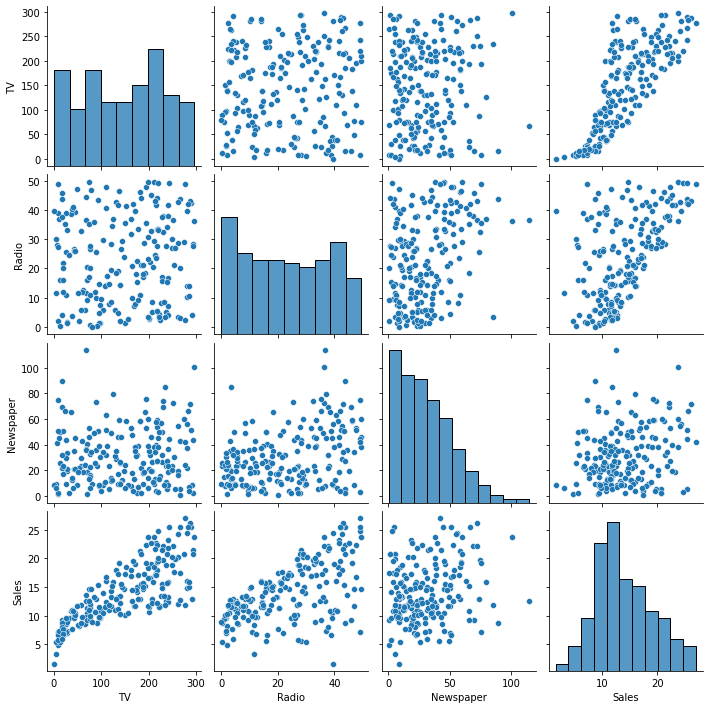

In [5]:
sns.pairplot(data = advertising)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

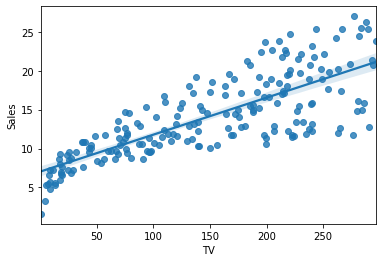

In [6]:
sns.regplot(x = 'TV', y = 'Sales', data = advertising)

In [7]:
X = advertising['TV']
y = advertising['Sales']

In [8]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [9]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    random_state = 100)

In [11]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [12]:
X_train_sm = sm.add_constant(X_train)

In [13]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
#here we are using the Ordinary Least Square of statsmodel API
lr = sm.OLS(y_train, X_train_sm)
lr

In [15]:
lr_model = lr.fit()

In [16]:
lr_model.params

const    6.989666
TV       0.046497
dtype: float64

In [17]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           2.84e-30
Time:                        11:08:17   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

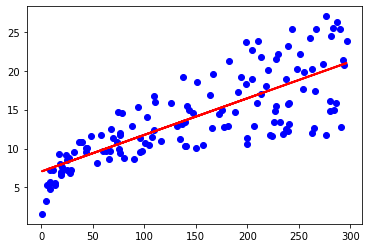

In [18]:
#plot a graph with X_train and Y_train
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_train, 7.0554 + 0.047 * X_train, color = "red", linewidth = 2)

In [19]:
#add a constant
X_test_sm = sm.add_constant(X_test)

In [20]:
y_pred = lr_model.predict(X_test_sm)

In [21]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(20)

,Actual,Predicted
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293


In [22]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score: %.2f' % r2_score(y_test, y_pred)) # Priniting R2 Score

R2 score: 0.59
